In [49]:
# Analiza i modyfikacja danych
import numpy as np
import pandas as pd
# Ewaluacja
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Wizualizacja


def read_raw_data():
    df = pd.read_csv('data/final_data_raw2.csv')
    return df.drop(columns=df.columns[0], axis=1)


def read_grouped_data():
    df = pd.read_csv('data/final_data.csv')
    return df.drop(columns=df.columns[0], axis=1)


def calculate_feeling_rate_distribution(df):
    print('DATA:')
    count = df.count()[0]
    for i in df['feeling_rate'].unique():
        occur = df['feeling_rate'].value_counts()[i]
        percent = (occur / count) * 100
        print(str(i) + ' ' + str(round(percent, 2)) + '%')


def print_df_information(df):
    print(df.head())
    print(df.info())
    print(df.describe())


def change_txt_data(df):
    print(df.describe(include=['O']))
    categoricals = list(df.select_dtypes(include=['O']).columns)
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[categoricals])
    train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))
    df = pd.concat((df, train_ohe), axis=1).drop(categoricals, axis=1)
    print(df.head())
    return df


def calculate_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
   



       time_of_day
count       560575
unique           6
top        Evening
freq         95895
   steps  heart_rate  raw_intensity  feeling_rate  Early Morning  Evening  \
0      0         243              0             4            0.0      0.0   
1      0         243              0             4            0.0      0.0   
2      0         243              0             4            0.0      0.0   
3      0         243              0             4            0.0      0.0   
4      0         243              0             4            0.0      0.0   

   Late Night  Morning  Night  Noon  
0         0.0      0.0    1.0   0.0  
1         0.0      0.0    1.0   0.0  
2         0.0      0.0    1.0   0.0  
3         0.0      0.0    1.0   0.0  
4         0.0      0.0    1.0   0.0  
DATA:
4 69.29%
3 18.17%
2 2.97%
5 7.61%
1 1.97%


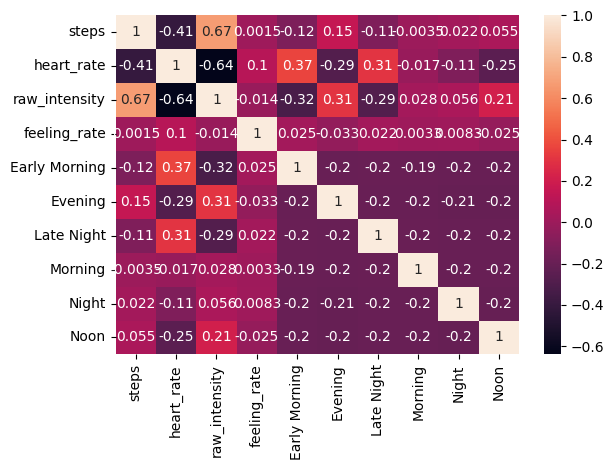

In [50]:

train_df = read_raw_data()
#train_df = read_grouped_data()
train_df = change_txt_data(train_df)
Y = train_df['feeling_rate'].values
X = train_df.drop(['feeling_rate'], axis=1).values
calculate_feeling_rate_distribution(train_df)

sns.heatmap(train_df.corr(), annot=True)
plt.tight_layout()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)



In [51]:
print('Tree')
tree = DecisionTreeClassifier(random_state=71830, class_weight='balanced')
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(tree, X_test, Y_test)


print('RandomTree')
random_tree = RandomForestClassifier(random_state=71830, class_weight='balanced')
random_tree.fit(X_train, Y_train)
Y_pred = random_tree.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(random_tree, X_test, Y_test)

print('K Neighbours')
kneighbors = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
kneighbors.fit(X_train, Y_train)
Y_pred = kneighbors.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(kneighbors, X_test, Y_test)

print('Naive Bayes')
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(gnb, X_test, Y_test)


Tree
0.33945513653492765
              precision    recall  f1-score   support

           1       0.04      0.58      0.08      2206
           2       0.06      0.37      0.10      3332
           3       0.28      0.21      0.24     20366
           4       0.82      0.19      0.31     77680
           5       0.11      0.34      0.16      8531

    accuracy                           0.22    112115
   macro avg       0.26      0.34      0.18    112115
weighted avg       0.63      0.22      0.27    112115

RandomTree
0.33862523084551543
              precision    recall  f1-score   support

           1       0.04      0.57      0.08      2206
           2       0.06      0.36      0.11      3332
           3       0.28      0.22      0.24     20366
           4       0.81      0.21      0.33     77680
           5       0.11      0.33      0.16      8531

    accuracy                           0.23    112115
   macro avg       0.26      0.34      0.18    112115
weighted avg       0.

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

In [52]:
#IMBALANCED DATA
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

over_tree = DecisionTreeClassifier(random_state=71830, class_weight='balanced')
over_tree.fit(X_resampled, Y_resampled)
Y_pred = over_tree.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(over_tree, X_test, Y_test)


over_random_forest = RandomForestClassifier(random_state=71830, class_weight='balanced')
over_random_forest.fit(X_resampled, Y_resampled)
Y_pred = over_random_forest.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(over_random_forest, X_test, Y_test)


0.3385961030208348
              precision    recall  f1-score   support

           1       0.04      0.58      0.08      2206
           2       0.06      0.37      0.10      3332
           3       0.28      0.21      0.24     20366
           4       0.82      0.19      0.31     77680
           5       0.11      0.34      0.16      8531

    accuracy                           0.22    112115
   macro avg       0.26      0.34      0.18    112115
weighted avg       0.63      0.22      0.28    112115

0.3382707071794596
              precision    recall  f1-score   support

           1       0.04      0.58      0.08      2206
           2       0.06      0.36      0.10      3332
           3       0.28      0.21      0.24     20366
           4       0.82      0.20      0.32     77680
           5       0.11      0.34      0.16      8531

    accuracy                           0.22    112115
   macro avg       0.26      0.34      0.18    112115
weighted avg       0.63      0.22      

In [53]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, Y_train)
tree_smote = DecisionTreeClassifier(random_state=71830, class_weight='balanced')
tree_smote.fit(X_resampled_smote, y_resampled_smote)
Y_pred = tree_smote.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(tree_smote, X_test, Y_test)


X_resampled_adasyn, Y_resampled_adasyn = ADASYN().fit_resample(X_train, Y_train)
tree_adasyn = DecisionTreeClassifier(random_state=71830, class_weight='balanced')
tree_adasyn.fit(X_resampled_adasyn, Y_resampled_adasyn)
Y_pred = tree_adasyn.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(tree_adasyn, X_test, Y_test)

0.33236940900532586
              precision    recall  f1-score   support

           1       0.04      0.54      0.08      2206
           2       0.06      0.34      0.10      3332
           3       0.28      0.23      0.25     20366
           4       0.80      0.23      0.36     77680
           5       0.11      0.32      0.16      8531

    accuracy                           0.25    112115
   macro avg       0.26      0.33      0.19    112115
weighted avg       0.62      0.25      0.31    112115

0.33028573960163177
              precision    recall  f1-score   support

           1       0.04      0.54      0.08      2206
           2       0.06      0.34      0.10      3332
           3       0.27      0.24      0.25     20366
           4       0.80      0.29      0.43     77680
           5       0.11      0.24      0.15      8531

    accuracy                           0.28    112115
   macro avg       0.25      0.33      0.20    112115
weighted avg       0.61      0.28    

In [54]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0)
bc.fit(X_train, Y_train)
Y_pred = bc.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(bc, X_test, Y_test)

bc = BaggingClassifier(base_estimator=RandomForestClassifier(),
                       random_state=0)
bc.fit(X_train, Y_train)
Y_pred = bc.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(bc, X_test, Y_test)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.22656048582295232
              precision    recall  f1-score   support

           1       0.09      0.00      0.01      2206
           2       0.42      0.05      0.08      3332
           3       0.47      0.07      0.12     20366
           4       0.70      0.98      0.82     77680
           5       0.34      0.04      0.07      8531

    accuracy                           0.69    112115
   macro avg       0.41      0.23      0.22    112115
weighted avg       0.61      0.69      0.60    112115



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.2236853634272354
              precision    recall  f1-score   support

           1       0.14      0.00      0.01      2206
           2       0.48      0.04      0.07      3332
           3       0.49      0.06      0.11     20366
           4       0.70      0.98      0.82     77680
           5       0.40      0.03      0.06      8531

    accuracy                           0.70    112115
   macro avg       0.44      0.22      0.21    112115
weighted avg       0.62      0.70      0.59    112115



In [55]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, Y_train)
Y_pred = bbc.predict(X_test)
balanced_accuracy_score(Y_test, Y_pred)
calculate_metrics(bbc, X_test, Y_test)

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.04      0.57      0.08      2206
           2       0.06      0.38      0.10      3332
           3       0.25      0.20      0.22     20366
           4       0.80      0.16      0.26     77680
           5       0.10      0.34      0.16      8531

    accuracy                           0.19    112115
   macro avg       0.25      0.33      0.16    112115
weighted avg       0.61      0.19      0.24    112115



In [56]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(
    n_estimators=100, random_state=0, sampling_strategy="all", replacement=True
)
brf.fit(X_train, Y_train)
Y_pred = brf.predict(X_test)
print(balanced_accuracy_score(Y_test, Y_pred))
calculate_metrics(bbc, X_test, Y_test)

0.33304112740140096
              precision    recall  f1-score   support

           1       0.04      0.57      0.08      2206
           2       0.06      0.38      0.10      3332
           3       0.25      0.20      0.22     20366
           4       0.80      0.16      0.26     77680
           5       0.10      0.34      0.16      8531

    accuracy                           0.19    112115
   macro avg       0.25      0.33      0.16    112115
weighted avg       0.61      0.19      0.24    112115

